In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [7]:
DFS = pd.read_csv("DFS.csv")
HOLX = pd.read_csv("HOLX.csv")
JPM = pd.read_csv("JPM.csv")
PG = pd.read_csv("PG.csv")
STE = pd.read_csv("STE.csv")

firms = {"DFS":DFS, "HOLX":HOLX, "JPM":JPM, "PG":PG, "STE":STE}

In [9]:
HOLX

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-03,40.00,40.40,39.76,40.15,2077600,0.0,0.0
1,2017-01-04,40.25,40.29,39.50,40.03,2803900,0.0,0.0
2,2017-01-05,40.05,40.19,39.65,39.79,1948400,0.0,0.0
3,2017-01-06,39.89,40.08,39.75,39.88,2337600,0.0,0.0
4,2017-01-09,39.82,40.13,39.81,40.05,1810900,0.0,0.0
...,...,...,...,...,...,...,...,...
1505,2022-12-23,75.13,75.79,74.81,75.51,1017700,0.0,0.0
1506,2022-12-27,75.80,75.80,75.04,75.75,863000,0.0,0.0
1507,2022-12-28,76.07,76.68,74.93,74.94,650200,0.0,0.0
1508,2022-12-29,75.45,76.63,74.96,76.10,750100,0.0,0.0


In [10]:
for df in firms.values():
    df["Date"] = pd.to_datetime(df["Date"])
    df.sort_values("Date", inplace=True)
    print(df.Date.dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [70]:
for firm, df in firms.items():
    if sum(df.Open == df.Close) == df.shape[0]:
        print(f"company {firm} doesn't have any difference between its Open and Close columns")

In [26]:
for firm, df in firms.items():
    max_price = df["Close"].max()
    min_price = df["Close"].max()
    print(f"Firm {firm}: highest close price recorded: {max_price}: lowest: {min_price}")

Firm DFS: highest close price recorded: 125.21: lowest: 125.21
Firm HOLX: highest close price recorded: 83.72: lowest: 83.72
Firm JPM: highest close price recorded: 157.933: lowest: 157.933
Firm PG: highest close price recorded: 153.402: lowest: 153.402
Firm STE: highest close price recorded: 246.342: lowest: 246.342


In [33]:
for firm, df in firms.items():
    df["Log_Returns"] = np.log(df.Close) - np.log(df.Close.shift(1)) 
    stats = df.Log_Returns.agg(["min", "max", "mean", "median"])
    print(f"{firm} Log Returns:\n{stats}\n")

DFS Log Returns:
min      -0.312464
max       0.237073
mean      0.000283
median    0.000647
Name: Close, dtype: float64

HOLX Log Returns:
min      -0.229757
max       0.089258
mean      0.000412
median    0.000711
Name: Close, dtype: float64

JPM Log Returns:
min      -0.162106
max       0.165621
mean      0.000396
median    0.000095
Name: Close, dtype: float64

PG Log Returns:
min      -0.091427
max       0.113408
mean      0.000500
median    0.000761
Name: Close, dtype: float64

STE Log Returns:
min      -0.123131
max       0.095377
mean      0.000702
median    0.001255
Name: Close, dtype: float64



In [36]:
for firm, df in firms.items():
    gain = df.loc[df["Log_Returns"].idxmax(), "Date"]
    loss = df.loc[df["Log_Returns"].idxmin(), "Date"]
    print(f" {firm}: date of highest gain: {gain} ; date of highest loss: {loss}")

 DFS: date of highest gain: 2020-03-24 00:00:00 ; date of highest loss: 2020-03-16 00:00:00
 HOLX: date of highest gain: 2022-11-01 00:00:00 ; date of highest loss: 2020-03-16 00:00:00
 JPM: date of highest gain: 2020-03-13 00:00:00 ; date of highest loss: 2020-03-16 00:00:00
 PG: date of highest gain: 2020-03-13 00:00:00 ; date of highest loss: 2020-03-12 00:00:00
 STE: date of highest gain: 2020-03-26 00:00:00 ; date of highest loss: 2020-03-16 00:00:00


In [37]:
for firm, df in firms.items():
    df.Date = pd.to_datetime(df.Date)
    df.set_index('Date', inplace=True) 
    avg_weekly_volume = df.Volume.resample('W').mean()
    highest = avg_weekly_volume.mean().max()
    print(f"{firm}: Average Weekly Volume = {avg_weekly_volume.mean()}")

DFS: Average Weekly Volume = 2382096.4057507985
HOLX: Average Weekly Volume = 2161212.5079872203
JPM: Average Weekly Volume = 14437008.722044729
PG: Average Weekly Volume = 7900000.143769968
STE: Average Weekly Volume = 503860.2076677316


total return = (ending value – starting value) + earnings in that period / starting value * 100

Highest reached by **STE**

In [48]:
for firm, df in firms.items():
    begin_value = df.Close.iloc[0]
    last_value = df.Close.iloc[-1]
    total_return = (last_value - begin_value)/begin_value * 100    
    print(f"{firm}: total return over the whole period: {total_return}")

DFS: total return over the whole period: 53.292743129833795
HOLX: total return over the whole period: 86.32627646326277
JPM: total return over the whole period: 81.76504216092611
PG: total return over the whole period: 112.70316509837468
STE: total return over the whole period: 188.4478833325373


In [49]:
#7.

for firms, df in firms.items():
    df["volume_class"] = 

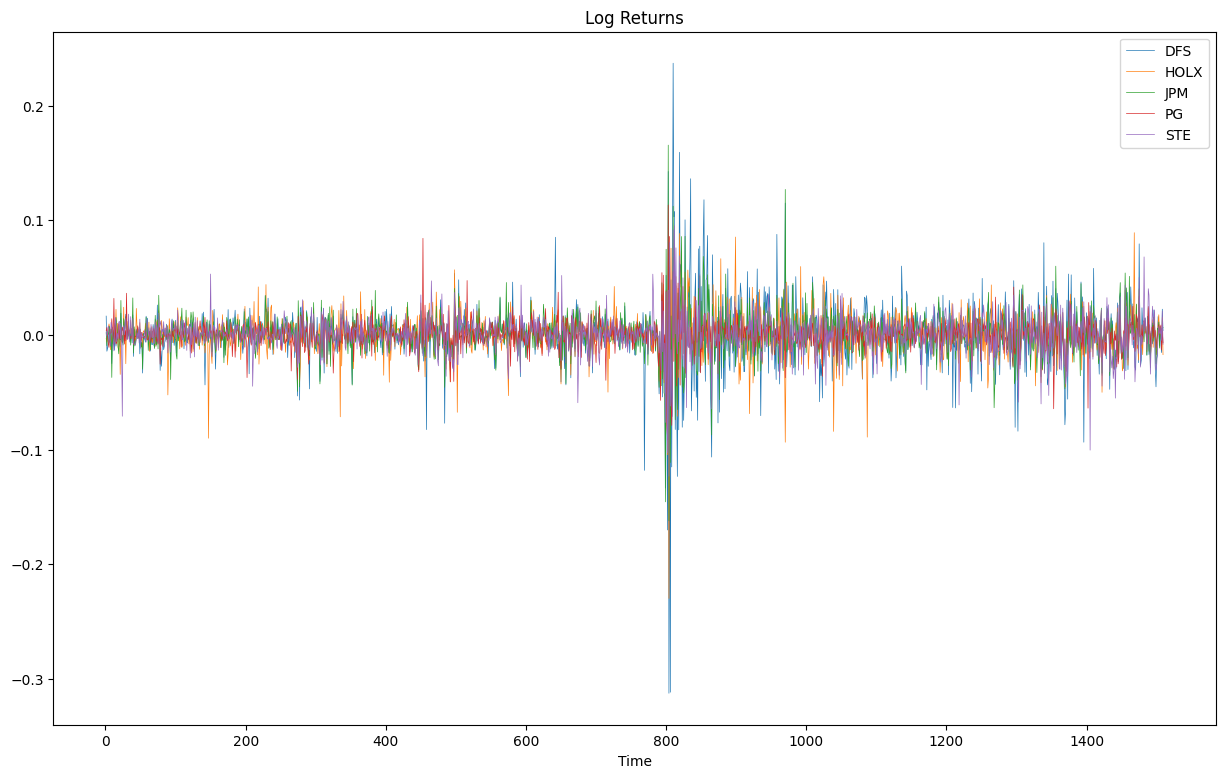

In [61]:
#A
plt.figure(figsize=(15,9))
for firm, df in firms.items():
    plt.plot(df.Log_Returns,label=firm, linewidth=0.5)
plt.title("Log Returns")
plt.xlabel("Time")
plt.legend()
plt.show()

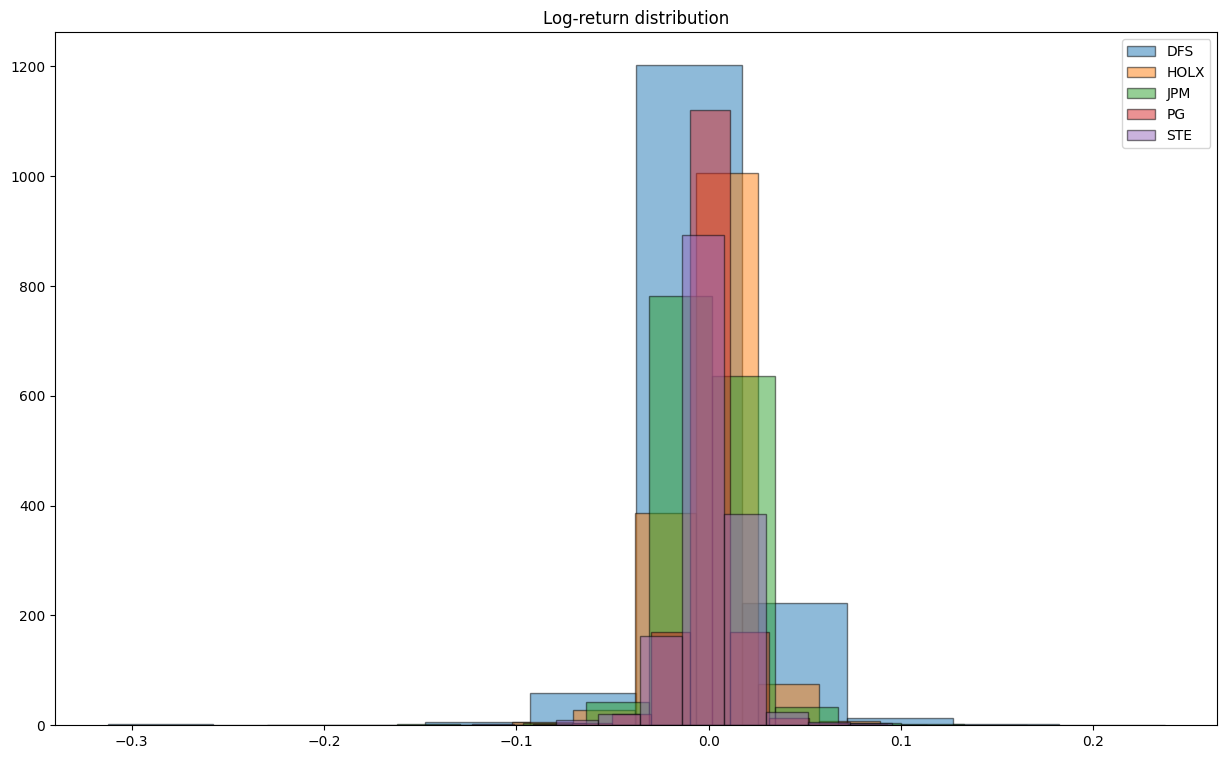

In [67]:
plt.figure(figsize=(15,9))
for firm, df in firms.items():
    plt.hist(df.Log_Returns, label= firm,alpha=0.5, edgecolor="black")
plt.legend()
plt.title("Log-return distribution")
plt.show()

## Part 2

In [1]:
import requests
import io


In [69]:
data = pd.read_csv("companies_no_subindustry.csv")

In [70]:
#1
print(data.included.isnull().sum())

45


In [71]:
#2
data.loc[:, "included"] = pd.to_datetime(data.included, errors="coerce", dayfirst=True)
data = data.dropna(subset=["included"])

In [72]:
print(data.included.isnull().sum())

0


In [11]:
data

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09 00:00:00,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26 00:00:00,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31 00:00:00,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31 00:00:00,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31 00:00:00,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1997-10-06 00:00:00,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",2019-12-23 00:00:00,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",2001-08-07 00:00:00,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",2001-06-22 00:00:00,1873


**Assumption**: for the companies that have 2 founding years listed, there is an assumption that the newer one might be a better reflection of the company as it could represent the year of company's restructuring

In [73]:
data.loc[:, "Founded"] = data["Founded"].str.extract(r'(\d{4})').astype(int)
data.head(5)

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09 00:00:00,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26 00:00:00,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31 00:00:00,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31 00:00:00,2013
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31 00:00:00,1981


In [80]:
#According to year
oldest = data.loc[data.Founded.idxmin()]
youngest = data.loc[data.Founded.idxmax()]
average = np.mean(data["Founded"])
print(f" founding year: oldest security: {oldest["Security"]} ({oldest["Founded"]}); youngest: {youngest["Security"]} ({youngest["Founded"]})")

#According to included
oldest_inc = data.loc[data.included.idxmin()]
youngest_inc = data.loc[data.included.idxmax()]
print(f" inclusion date: oldest security: {oldest_inc["Security"]} ({oldest_inc["Founded"]}); youngest: {youngest_inc["Security"]} ({youngest_inc["Founded"]})")

 founding year: oldest security: BNY Mellon (1784); youngest: Warner Bros. Discovery (2022)
 inclusion date: oldest security: Altria (1985); youngest: Arch Capital Group (1995)


In [31]:
data

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09 00:00:00,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26 00:00:00,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31 00:00:00,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31 00:00:00,2013
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31 00:00:00,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1997-10-06 00:00:00,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",2019-12-23 00:00:00,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",2001-08-07 00:00:00,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",2001-06-22 00:00:00,1873


In [32]:
sectors = data.GICS_Sector.value_counts().reset_index()
sectors.columns=["Sector","Dist"]
sectors

,Sector,Dist
0,Information Technology,68
1,Industrials,66
2,Health Care,60
3,Financials,55
4,Consumer Discretionary,52
5,Consumer Staples,33
6,Real Estate,29
7,Materials,26
8,Communication Services,22
9,Utilities,22


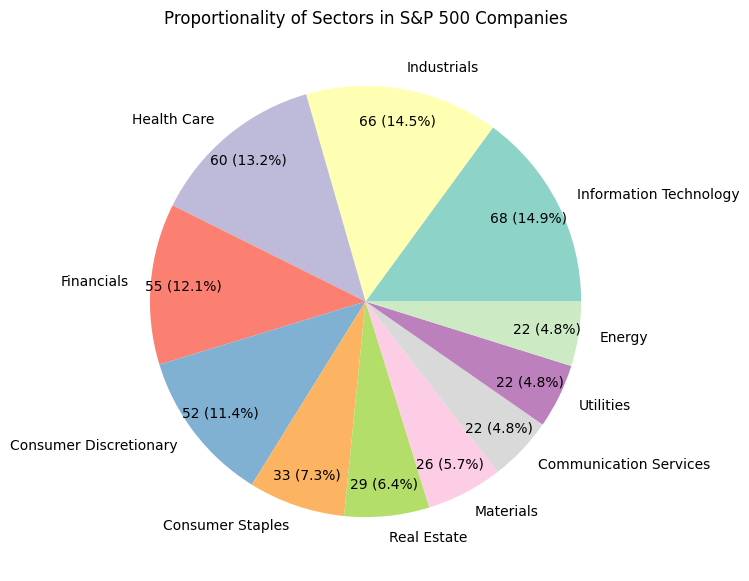

In [34]:
#3. 
colors = plt.cm.Set3.colors
plt.figure(figsize=(10,7))
plt.pie(sectors.Dist,labels=sectors.Sector,colors=colors,autopct=lambda pct: f"{int(pct/100.*sum(sectors.Dist))} ({pct:.1f}%)",pctdistance=0.85)
plt.title("Proportionality of Sectors in S&P 500 Companies")
plt.ylabel("")
plt.xticks(rotation = 90)
plt.show()


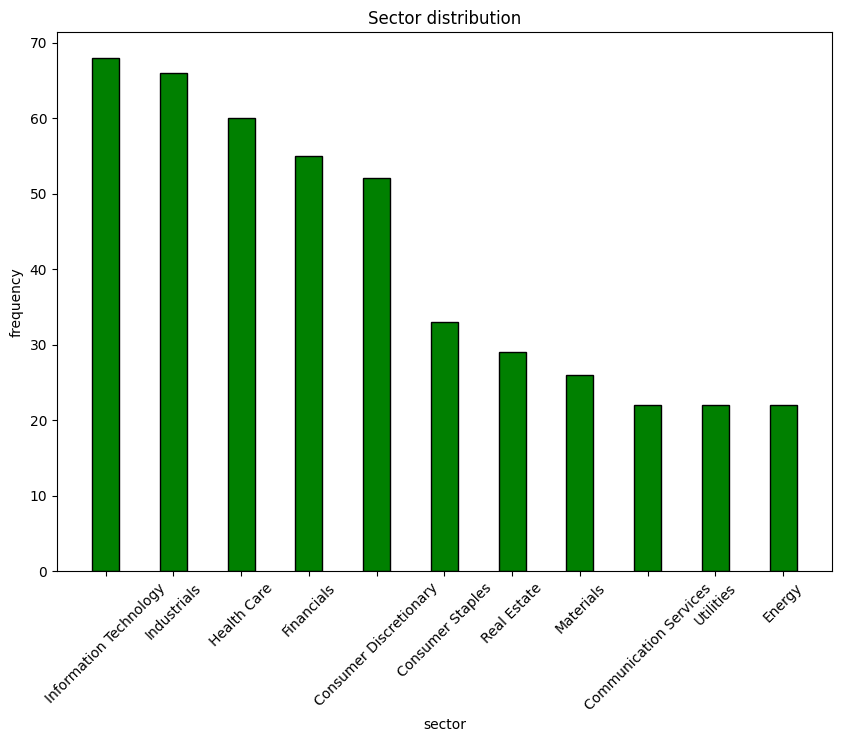

In [35]:
plt.figure(figsize=(10, 7))
plt.bar(sectors.Sector, sectors.Dist, color="green", edgecolor="black", width=0.4)  
plt.title("Sector distribution")
plt.xlabel("sector")
plt.ylabel("frequency")
plt.xticks(rotation=45)
plt.show()

In [42]:
data["State"] = data.hq.apply(lambda x: x.split(",")[-1])
states = data.State.value_counts().reset_index()
states.columns = ["State","Dist"]
states.transpose()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
State,California,New York,Texas,Illinois,Pennsylvania,Massachusetts,Ohio,North Carolina,Georgia,New Jersey,...,D.C.,UK,Tennessee,Maine,Iowa,Oregon,Florida,Kingdom of the Netherlands,Israel,Switzerland
Dist,65,43,40,31,19,18,17,16,16,15,...,1,1,1,1,1,1,1,1,1,1


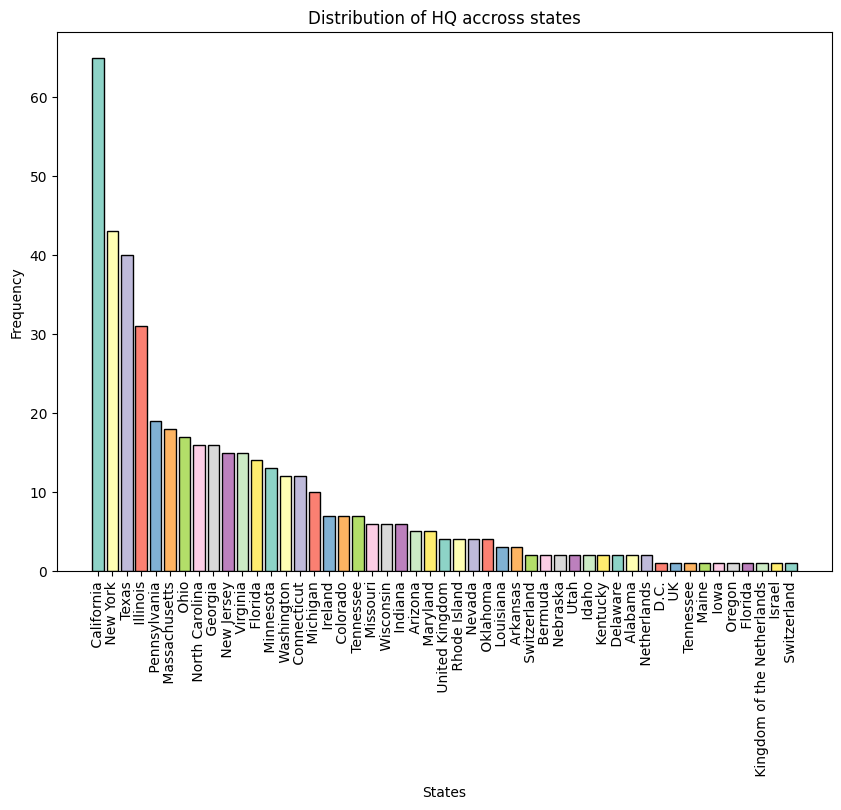

In [47]:
plt.figure(figsize=(10,7))
plt.bar(states.State, states.Dist, color =colors, edgecolor="black")
plt.title("Distribution of HQ accross states")
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Frequency")
plt.show()


In [50]:
data2 = pd.read_csv("companies_subindustry.csv")
data2

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment
...,...,...
498,YUM,Restaurants
499,ZBRA,Electronic Equipment & Instruments
500,ZBH,Health Care Equipment
501,ZION,Regional Banks


In [54]:
joined = data.merge(data2, on="Symbol")
joined.head(2)

,Symbol,Security,GICS_Sector,hq,included,Founded,State,subindustry
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09 00:00:00,1902,Minnesota,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26 00:00:00,1916,Wisconsin,Building Products


In [55]:
subs = joined.loc[joined.GICS_Sector == "Consumer Discretionary", "subindustry"].value_counts().reset_index()
subs.columns = ["Subindustries","Frequency"]
subs

,Subindustries,Frequency
0,Specialty Stores,6
1,Restaurants,5
2,Internet & Direct Marketing Retail,5
3,Homebuilding,4
4,Casinos & Gaming,4
5,"Hotels, Resorts & Cruise Lines",4
6,General Merchandise Stores,3
7,Automobile Manufacturers,3
8,"Apparel, Accessories & Luxury Goods",3
9,Auto Parts & Equipment,2


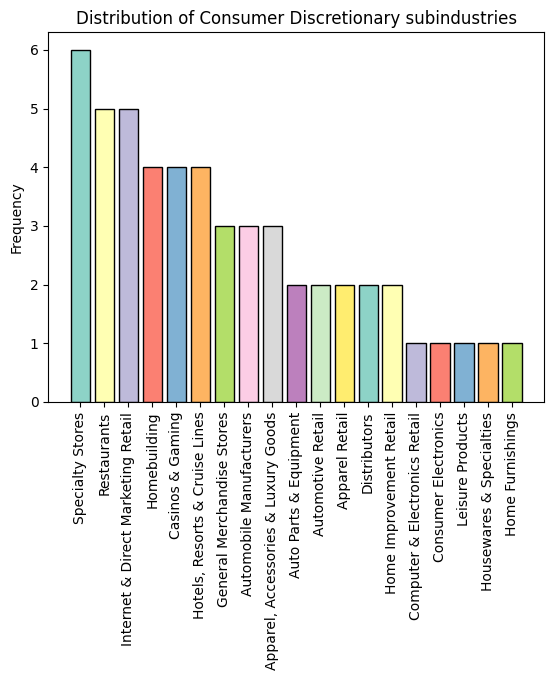

In [57]:
plt.bar(subs.Subindustries, subs.Frequency, color = colors, edgecolor = "black")
plt.title("Distribution of Consumer Discretionary subindustries")
plt.xticks(rotation = 90)
plt.ylabel("Frequency")
plt.show()